In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd 'drive/My Drive/SDG'

[Errno 2] No such file or directory: 'drive/My Drive/SDG'
/content/drive/My Drive/SDG


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
df_rated = pd.read_csv('urls_2020.csv')

In [ ]:
df_rated

# Method 1: absolute value

In [ ]:
# TODO 1: Set quantile

a = [0.5,0.7,0.9] # count
b = [0.5,0.3,0.1] # standard deviation

Quantile = pd.DataFrame(a, columns= ['Quantile'])
for k in range(1,18):
    Quantile['SDG_'+str(k)+'_count'] = df_rated['SDG_'+str(k)+'_count'].quantile(a).values
Quantile.to_csv('Quantile_SDG_count.csv')

Quantile = pd.DataFrame(b, columns= ['Quantile'])
for k in range(1,18):
    Quantile['SDG_'+str(k)+'_std'] = df_rated['SDG_'+str(k)+'_std'].quantile(b).values
Quantile.to_csv('Quantile_SDG_std.csv')

In [ ]:
total = pd.DataFrame(df_rated[['MA_7day_1', 'MA_7day_2', 'MA_7day_3',
       'MA_7day_4', 'MA_7day_5', 'MA_7day_6', 'MA_7day_7', 'MA_7day_8',
       'MA_7day_9', 'MA_7day_10', 'MA_7day_11', 'MA_7day_12', 'MA_7day_13',
       'MA_7day_14', 'MA_7day_15', 'MA_7day_16', 'MA_7day_17', 'MA_7day_Mean']].notnull().sum(), columns = ['number'])
total

,number
MA_7day_1,88882
MA_7day_2,89673
MA_7day_3,91612
MA_7day_4,91302
MA_7day_5,83464
MA_7day_6,87285
MA_7day_7,89049
MA_7day_8,91464
MA_7day_9,91302
MA_7day_10,91612


## other Scale

In [ ]:
# TODO 2: scale = 3:
scale = 3
result = pd.DataFrame(itertools.product(a, b), columns=['count', 'std'])
for k in range(1, 18):
    df = df_rated[abs(df_rated['MA_7day_' + str(k)]) > scale][
        ['COMPANY', 'date', 'MA_7day_' + str(k), 'SDG_' + str(k) + '_count', 'SDG_' + str(k) + '_std']]
    for i, j in itertools.product(a, b):
        df1 = df[(df['SDG_' + str(k) + '_count'] > df_rated['SDG_' + str(k) + '_count'].quantile([i]).values[0]) & (
                    df['SDG_' + str(k) + '_std'] < df_rated['SDG_' + str(k) + '_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j), 'ST_' + str(k) + '_number of outlier'] = \
        df1[['MA_7day_' + str(k)]].count().values[0]

df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][
    ['COMPANY', 'date', 'MA_7day_Mean', 'SDG_count_Mean', 'SDG_std_Mean']]
for i, j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (
                df['SDG_std_Mean'] < df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j), 'ST_Mean_number of outlier'] = \
    df1[['MA_7day_Mean']].count().values[0]
result.to_csv('Outlier(absolute SDG value)_scale = 3.csv')
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,491.0,267.0,468.0,207.0,106.0,254.0,1153.0,533.0,514.0,536.0,424.0,556.0,297.0,307.0,392.0,475.0,234.0,995.0
1,0.5,0.3,333.0,209.0,346.0,187.0,106.0,190.0,712.0,353.0,398.0,400.0,325.0,351.0,239.0,246.0,312.0,369.0,173.0,604.0
2,0.5,0.1,52.0,37.0,28.0,58.0,18.0,44.0,91.0,26.0,44.0,43.0,22.0,28.0,49.0,28.0,44.0,33.0,28.0,71.0
3,0.7,0.5,352.0,195.0,349.0,114.0,71.0,174.0,850.0,437.0,388.0,416.0,331.0,461.0,224.0,245.0,293.0,376.0,172.0,854.0
4,0.7,0.3,214.0,142.0,241.0,97.0,71.0,121.0,468.0,274.0,284.0,297.0,246.0,271.0,169.0,187.0,220.0,283.0,118.0,502.0
5,0.7,0.1,8.0,9.0,7.0,14.0,8.0,16.0,20.0,10.0,11.0,12.0,7.0,15.0,16.0,8.0,12.0,12.0,10.0,41.0
6,0.9,0.5,160.0,81.0,181.0,67.0,19.0,61.0,479.0,245.0,226.0,237.0,176.0,233.0,77.0,101.0,125.0,207.0,55.0,510.0
7,0.9,0.3,82.0,58.0,125.0,56.0,19.0,42.0,249.0,150.0,158.0,165.0,134.0,130.0,59.0,74.0,92.0,152.0,38.0,292.0
8,0.9,0.1,0.0,0.0,1.0,4.0,0.0,2.0,2.0,1.0,3.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,0.0,14.0


In [ ]:
## scale = 3, count = 0.9, std = 0.3, sdg = 1
a = [0.9]
b = [0.3]
scale = 3
result = pd.DataFrame(itertools.product(a, b), columns=['count', 'std'])
for k in range(1, 2):
    df = df_rated[abs(df_rated['MA_7day_' + str(k)]) > scale][
        ['COMPANY', 'date', 'MA_7day_' + str(k), 'SDG_' + str(k) + '_count', 'SDG_' + str(k) + '_std','SDG_'+str(k)+'_url' ]]
    for i, j in itertools.product(a, b):
        df1 = df[(df['SDG_' + str(k) + '_count'] > df_rated['SDG_' + str(k) + '_count'].quantile([i]).values[0]) & (
                    df['SDG_' + str(k) + '_std'] < df_rated['SDG_' + str(k) + '_std'].quantile([j]).values[0])]
df1.to_csv('outlier_sdg1_count9_std3_2020.csv')
df1

,COMPANY,date,MA_7day_1,SDG_1_count,SDG_1_std,SDG_1_url
178,american airlines group,2020-01-31,-4.664883,44.0,1.397411,['https://www.irrawaddy.com/news/asia/declares...
212,american airlines group,2020-03-05,-3.214584,36.0,1.295427,['https://abc7news.com/health/live-coronavirus...
213,american airlines group,2020-03-06,-3.336619,31.0,1.312612,['http://baystreet.ca/articles/marketupdates/5...
227,american airlines group,2020-03-20,-3.126931,70.0,0.773396,['https://www.pantagraph.com/news/state-and-re...
228,american airlines group,2020-03-21,-3.313265,40.0,0.989274,['https://www.americanpress.com/news/business/...
...,...,...,...,...,...,...
82576,united continental holdings inc,2020-05-20,-3.011950,31.0,1.204589,['https://www.ksl.com/article/46755005/kroger-...
86588,verizon communications inc,2020-01-09,-3.342870,30.0,1.201322,['https://wtop.com/national/2020/01/california...
90018,wynn resorts ltd,2020-02-04,-4.688537,54.0,0.945468,['https://www.fairfieldcitizenonline.com/news/...
90810,exxon mobil corporation,2020-03-27,-3.373351,28.0,1.497642,['https://www.chronogram.com/hudsonvalley/huds...


In [ ]:
# percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage.to_csv('percentage(absolute SDG value)_scale = 3.csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.552418,0.297748,0.510850,0.226720,0.127001,0.291001,1.294793,0.582743,0.562967,0.585076,0.462075,0.618217,0.338979,0.349543,0.445956,0.517655,0.266524,1.080864
1,0.5,0.3,0.374654,0.233069,0.377680,0.204815,0.127001,0.217678,0.799560,0.385944,0.435916,0.436624,0.354185,0.390278,0.272781,0.280090,0.354945,0.402136,0.197045,0.656122
2,0.5,0.1,0.058505,0.041261,0.030564,0.063525,0.021566,0.050410,0.102191,0.028426,0.048192,0.046937,0.023976,0.031133,0.055926,0.031880,0.050056,0.035963,0.031892,0.077127
3,0.7,0.5,0.396031,0.217457,0.380954,0.124860,0.085067,0.199347,0.954531,0.477784,0.424963,0.454089,0.360724,0.512587,0.255661,0.278951,0.333330,0.409765,0.195906,0.927696
4,0.7,0.3,0.240769,0.158353,0.263066,0.106241,0.085067,0.138626,0.525553,0.299571,0.311056,0.324193,0.268091,0.301325,0.192887,0.212914,0.250282,0.308413,0.134401,0.545320
5,0.7,0.1,0.009001,0.010036,0.007641,0.015334,0.009585,0.018331,0.022460,0.010933,0.012048,0.013099,0.007629,0.016679,0.018262,0.009109,0.013652,0.013078,0.011390,0.044538
6,0.9,0.5,0.180014,0.090328,0.197572,0.073383,0.022764,0.069886,0.537906,0.267865,0.247530,0.258700,0.191805,0.259073,0.087883,0.114996,0.142205,0.225588,0.062645,0.554011
7,0.9,0.3,0.092257,0.064679,0.136445,0.061335,0.022764,0.048118,0.279621,0.163999,0.173052,0.180107,0.146033,0.144547,0.067339,0.084255,0.104663,0.165650,0.043282,0.317198
8,0.9,0.1,0.000000,0.000000,0.001092,0.004381,0.000000,0.002291,0.002246,0.001093,0.003286,0.002183,0.002180,0.000000,0.002283,0.001139,0.002275,0.002180,0.000000,0.015208


In [ ]:
scale =3.5
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]

df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,210.0,103.0,198.0,78.0,54.0,100.0,742.0,265.0,236.0,226.0,171.0,262.0,144.0,125.0,204.0,200.0,107.0,523.0
1,0.5,0.3,141.0,82.0,145.0,72.0,54.0,78.0,471.0,187.0,180.0,185.0,130.0,169.0,120.0,98.0,165.0,153.0,77.0,317.0
2,0.5,0.1,22.0,18.0,11.0,25.0,8.0,19.0,53.0,14.0,19.0,22.0,9.0,11.0,21.0,13.0,18.0,13.0,17.0,28.0
3,0.7,0.5,156.0,72.0,145.0,39.0,36.0,72.0,572.0,219.0,176.0,166.0,138.0,217.0,113.0,100.0,158.0,158.0,73.0,461.0
4,0.7,0.3,96.0,54.0,98.0,34.0,36.0,52.0,333.0,146.0,127.0,131.0,101.0,130.0,89.0,74.0,123.0,118.0,48.0,271.0
5,0.7,0.1,2.0,6.0,5.0,6.0,3.0,9.0,10.0,3.0,5.0,4.0,3.0,7.0,5.0,5.0,2.0,4.0,5.0,18.0
6,0.9,0.5,77.0,31.0,67.0,24.0,14.0,27.0,344.0,141.0,109.0,93.0,74.0,108.0,43.0,42.0,76.0,95.0,22.0,291.0
7,0.9,0.3,38.0,23.0,44.0,19.0,14.0,19.0,188.0,93.0,76.0,74.0,57.0,63.0,33.0,29.0,59.0,67.0,14.0,168.0
8,0.9,0.1,0.0,0.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0


In [ ]:
#percentage
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage.to_csv('percentage(absolute SDG value)_scale = 3.5.csv')
percentage


,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.236268,0.114862,0.216129,0.085431,0.064699,0.114567,0.833249,0.289731,0.258483,0.246693,0.186356,0.291318,0.164354,0.142322,0.232079,0.217960,0.121872,0.568132
1,0.5,0.3,0.158637,0.091443,0.158276,0.078859,0.064699,0.089362,0.528922,0.204452,0.197148,0.201939,0.141674,0.187911,0.136961,0.111580,0.187711,0.166739,0.087702,0.344356
2,0.5,0.1,0.024752,0.020073,0.012007,0.027382,0.009585,0.021768,0.059518,0.015307,0.020810,0.024014,0.009808,0.012231,0.023968,0.014801,0.020478,0.014167,0.019363,0.030416
3,0.7,0.5,0.175514,0.080292,0.158276,0.042715,0.043132,0.082488,0.642343,0.239438,0.192767,0.181199,0.150392,0.241283,0.128972,0.113858,0.179748,0.172188,0.083146,0.500782
4,0.7,0.3,0.108008,0.060219,0.106973,0.037239,0.043132,0.059575,0.373951,0.159626,0.139099,0.142994,0.110070,0.144547,0.101580,0.084255,0.139930,0.128596,0.054672,0.294386
5,0.7,0.1,0.002250,0.006691,0.005458,0.006572,0.003594,0.010311,0.011230,0.003280,0.005476,0.004366,0.003269,0.007783,0.005707,0.005693,0.002275,0.004359,0.005695,0.019553
6,0.9,0.5,0.086632,0.034570,0.073135,0.026286,0.016774,0.030933,0.386304,0.154159,0.119384,0.101515,0.080645,0.120085,0.049078,0.047820,0.086461,0.103531,0.025058,0.316112
7,0.9,0.3,0.042753,0.025649,0.048029,0.020810,0.016774,0.021768,0.211120,0.101679,0.083240,0.080775,0.062119,0.070050,0.037664,0.033019,0.067121,0.073017,0.015946,0.182498
8,0.9,0.1,0.000000,0.000000,0.001092,0.002191,0.000000,0.002291,0.001123,0.000000,0.003286,0.001092,0.002180,0.000000,0.001141,0.001139,0.001138,0.001090,0.000000,0.008690


In [ ]:
scale = 4
result = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for k in range(1,18):
    df = df_rated[abs(df_rated['MA_7day_'+str(k)]) > scale][['COMPANY','date','MA_7day_'+str(k),'SDG_'+str(k)+'_count','SDG_'+str(k)+'_std']]
    for i,j in itertools.product(a, b):
        df1 = df[(df['SDG_'+str(k)+'_count'] > df_rated['SDG_'+str(k)+'_count'].quantile([i]).values[0]) & (df['SDG_'+str(k)+'_std']< df_rated['SDG_'+str(k)+'_std'].quantile([j]).values[0])]
        result.loc[(result['count'] == i) & (result['std'] == j),'ST_'+str(k)+'_number of outlier'] = df1[['MA_7day_'+str(k)]].count().values[0]
df = df_rated[abs(df_rated['MA_7day_Mean']) > scale][['COMPANY','date','MA_7day_Mean','SDG_count_Mean','SDG_std_Mean']]
for i,j in itertools.product(a, b):
    df1 = df[(df['SDG_count_Mean'] > df_rated['SDG_count_Mean'].quantile([i]).values[0]) & (df['SDG_std_Mean']< df_rated['SDG_std_Mean'].quantile([j]).values[0])]
    result.loc[(result['count'] == i) & (result['std'] == j),'ST_Mean_number of outlier'] = df1[['MA_7day_Mean']].count().values[0]
result.to_csv('Outlier(absolute SDG value)_scale = 4.csv')
result

,count,std,ST_1_number of outlier,ST_2_number of outlier,ST_3_number of outlier,ST_4_number of outlier,ST_5_number of outlier,ST_6_number of outlier,ST_7_number of outlier,ST_8_number of outlier,ST_9_number of outlier,ST_10_number of outlier,ST_11_number of outlier,ST_12_number of outlier,ST_13_number of outlier,ST_14_number of outlier,ST_15_number of outlier,ST_16_number of outlier,ST_17_number of outlier,ST_Mean_number of outlier
0,0.5,0.5,89.0,42.0,72.0,31.0,25.0,39.0,438.0,131.0,91.0,67.0,61.0,121.0,66.0,59.0,103.0,73.0,45.0,257.0
1,0.5,0.3,59.0,35.0,54.0,29.0,25.0,32.0,278.0,97.0,68.0,54.0,45.0,84.0,55.0,47.0,85.0,56.0,36.0,158.0
2,0.5,0.1,10.0,9.0,3.0,13.0,3.0,7.0,28.0,7.0,6.0,8.0,1.0,4.0,4.0,2.0,7.0,1.0,11.0,15.0
3,0.7,0.5,62.0,28.0,46.0,14.0,16.0,28.0,346.0,111.0,70.0,46.0,54.0,96.0,54.0,49.0,83.0,56.0,29.0,236.0
4,0.7,0.3,37.0,23.0,33.0,13.0,16.0,21.0,203.0,78.0,50.0,35.0,39.0,64.0,43.0,38.0,65.0,42.0,22.0,142.0
5,0.7,0.1,1.0,5.0,1.0,4.0,1.0,3.0,7.0,2.0,2.0,2.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,12.0
6,0.9,0.5,23.0,10.0,22.0,10.0,8.0,11.0,210.0,72.0,43.0,21.0,33.0,51.0,24.0,18.0,50.0,31.0,8.0,158.0
7,0.9,0.3,11.0,8.0,17.0,9.0,8.0,7.0,117.0,50.0,33.0,18.0,25.0,32.0,18.0,12.0,40.0,22.0,6.0,92.0
8,0.9,0.1,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0


In [ ]:
percentage = pd.DataFrame(itertools.product(a, b),columns = ['count','std'])
for i in range(1,18):
    percentage['ST_'+ str(i) + '_outlier percentage(%)'] = result['ST_'+ str(i) + '_number of outlier']/total.loc['MA_7day_'+ str(i),'number']*100
percentage['ST_Mean_outlier percentage(%)'] = result['ST_Mean_number of outlier']/total.loc['MA_7day_Mean','number']*100
percentage.to_csv('percentage(absolute SDG value)_scale = 4.csv')
percentage

,count,std,ST_1_outlier percentage(%),ST_2_outlier percentage(%),ST_3_outlier percentage(%),ST_4_outlier percentage(%),ST_5_outlier percentage(%),ST_6_outlier percentage(%),ST_7_outlier percentage(%),ST_8_outlier percentage(%),ST_9_outlier percentage(%),ST_10_outlier percentage(%),ST_11_outlier percentage(%),ST_12_outlier percentage(%),ST_13_outlier percentage(%),ST_14_outlier percentage(%),ST_15_outlier percentage(%),ST_16_outlier percentage(%),ST_17_outlier percentage(%),ST_Mean_outlier percentage(%)
0,0.5,0.5,0.100133,0.046837,0.078592,0.033953,0.029953,0.044681,0.491864,0.143226,0.099669,0.073135,0.066478,0.134540,0.075329,0.067176,0.117177,0.079555,0.051255,0.279178
1,0.5,0.3,0.066380,0.039031,0.058944,0.031763,0.029953,0.036662,0.312188,0.106053,0.074478,0.058944,0.049041,0.093400,0.062774,0.053513,0.096700,0.061029,0.041004,0.171635
2,0.5,0.1,0.011251,0.010036,0.003275,0.014238,0.003594,0.008020,0.031443,0.007653,0.006572,0.008732,0.001090,0.004448,0.004565,0.002277,0.007964,0.001090,0.012529,0.016294
3,0.7,0.5,0.069755,0.031225,0.050212,0.015334,0.019170,0.032079,0.388550,0.121359,0.076669,0.050212,0.058849,0.106743,0.061633,0.055790,0.094424,0.061029,0.033031,0.256366
4,0.7,0.3,0.041628,0.025649,0.036021,0.014238,0.019170,0.024059,0.227964,0.085279,0.054763,0.038205,0.042502,0.071162,0.049078,0.043266,0.073947,0.045772,0.025058,0.154254
5,0.7,0.1,0.001125,0.005576,0.001092,0.004381,0.001198,0.003437,0.007861,0.002187,0.002191,0.002183,0.001090,0.003336,0.000000,0.002277,0.001138,0.000000,0.005695,0.013036
6,0.9,0.5,0.025877,0.011152,0.024014,0.010953,0.009585,0.012602,0.235825,0.078719,0.047096,0.022923,0.035963,0.056707,0.027392,0.020494,0.056882,0.033784,0.009112,0.171635
7,0.9,0.3,0.012376,0.008921,0.018557,0.009857,0.009585,0.008020,0.131388,0.054666,0.036144,0.019648,0.027245,0.035581,0.020544,0.013663,0.045506,0.023976,0.006834,0.099939
8,0.9,0.1,0.000000,0.000000,0.000000,0.002191,0.000000,0.001146,0.001123,0.000000,0.001095,0.000000,0.001090,0.000000,0.000000,0.001139,0.001138,0.000000,0.000000,0.004345


# method 1: function filter for dashboard

## Line graph

In [ ]:
all_day = list(set(df_rated['date']))
all_day.sort()
last_day = all_day[-1] # '2020-01-01'-'2020-05-27'
first_day = all_day[0]

In [ ]:
def method_1_filter(sdg, scale=3, count=0.9, std=0.3, date='all'): # 'all'
    a = [count]
    b = [std]
    result = pd.DataFrame(itertools.product(a, b), columns=['count', 'std'])
    df = df_rated[abs(df_rated['MA_7day_' + str(sdg)]) > scale][
        ['COMPANY', 'date', 'MA_7day_' + str(sdg), 'SDG_' + str(sdg) + '_count', 'SDG_' + str(sdg) + '_std','SDG_'+str(sdg)+'_url' ]]
    df1 = df[(df['SDG_' + str(sdg) + '_count'] > df_rated['SDG_' + str(sdg) + '_count'].quantile([count]).values[0]) & (df['SDG_' + str(sdg) + '_std'] < df_rated['SDG_' + str(sdg) + '_std'].quantile([std]).values[0])]
    if date != 'all':
        df1 = df1[df1['date']==date]
    file_name = 'outlier_sdg'+str(sdg)+'_'+str(date)+'.csv'
    df1.to_csv(file_name)
    return df1,file_name


In [ ]:
df,file_name = method_1_filter()
outlier_day = list(set(df['date']))
outlier_day.sort()

In [ ]:
col = ['company', 'outlier_date', 'sdg' ]+['T-'+str(x) for x in range(10,0,-1)]+['T0']+['T+'+str(x) for x in range(1,11)]
line_graph = pd.DataFrame(columns=col)

In [ ]:
for sdg in range(1,18):
    df,file_name = method_1_filter(sdg=sdg, scale=3, count=0.9, std=0.3, date='all')
    for i in range(len(df)):
        day = list(df['date'])[i]
        co = list(df['COMPANY'])[i]
        ind = all_day.index(day)
        
        head = [co, day, 'SDG'+str(sdg)]
        body1 = []
        body2 = []

        for i in range(ind-10,ind):
            if i >= 0:
                sample = df_rated[(df_rated['COMPANY']==co)& (df_rated['date']==all_day[i])]
                body1.append(list(sample['MA_7day_'+str(sdg)])[0])
            else:
                body1.append(None)
        for j in range(ind,ind+11):
            if j < len(all_day):
                sample = df_rated[(df_rated['COMPANY']==co)& (df_rated['date']==all_day[j])]
                body2.append(list(sample['MA_7day_'+str(sdg)])[0])
            else:
                body2.append(None)

        row = head + body1 + body2
        new_row = {}
        for i in range(len(row)):
            new_row[col[i]] = row[i]
        line_graph = line_graph.append(new_row,ignore_index=True)

In [ ]:
line_graph

,company,outlier_date,sdg,T-10,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,T0,T+1,T+2,T+3,T+4,T+5,T+6,T+7,T+8,T+9,T+10
0,american airlines group,2020-01-31,SDG1,0.440160,0.102047,-0.353112,-0.653249,-0.923116,-1.238147,-2.538497,-2.930376,-3.113757,-3.985006,-4.664883,-5.03695,-5.1401,-5.06736,-4.88024,-4.48512,-3.80858,-3.66592,-3.05502,-3.28979,-2.32218
1,american airlines group,2020-03-05,SDG1,-0.472331,-1.265209,-1.584602,-1.644682,-1.558534,-0.856338,-0.953208,-1.778898,-2.465333,-2.719270,-3.214584,-3.33662,-2.85005,-0.570589,-0.00534882,-0.399165,-0.578865,-2.39344,-2.9864,-3.53596,-4.51989
2,american airlines group,2020-03-06,SDG1,-1.265209,-1.584602,-1.644682,-1.558534,-0.856338,-0.953208,-1.778898,-2.465333,-2.719270,-3.214584,-3.336619,-2.85005,-0.570589,-0.00534882,-0.399165,-0.578865,-2.39344,-2.9864,-3.53596,-4.51989,-4.43178
3,american airlines group,2020-03-20,SDG1,-0.399165,-0.578865,-2.393439,-2.986401,-3.535965,-4.519888,-4.431779,-4.463590,-3.249227,-3.069682,-3.126931,-3.31327,-3.30212,-3.21875,-2.61478,-2.20087,-2.05207,-2.09298,-2.24438,-2.10564,-2.35554
4,american airlines group,2020-03-21,SDG1,-0.578865,-2.393439,-2.986401,-3.535965,-4.519888,-4.431779,-4.463590,-3.249227,-3.069682,-3.126931,-3.313265,-3.30212,-3.21875,-2.61478,-2.20087,-2.05207,-2.09298,-2.24438,-2.10564,-2.35554,-2.31432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,united continental holdings inc,2020-03-15,SDG17,-0.732854,-1.640621,-1.937696,-1.366101,-1.386974,-1.561898,-1.305878,-1.780125,-2.067860,-2.575009,-3.213363,-3.5885,-3.30498,-2.66939,-2.13694,-2.42956,-2.28321,-2.19066,-2.27424,-2.3114,-2.03334
1779,exxon mobil corporation,2020-04-07,SDG17,-2.213532,-2.213532,-2.207321,-2.326902,-2.240222,-2.422914,-2.379326,-2.332484,-2.954745,-3.128150,-3.033065,-3.15535,-3.13178,-3.29223,-3.2155,-3.13088,-3.4271,-3.38245,-3.35491,-2.96587,-2.22487
1780,exxon mobil corporation,2020-04-08,SDG17,-2.213532,-2.207321,-2.326902,-2.240222,-2.422914,-2.379326,-2.332484,-2.954745,-3.128150,-3.033065,-3.155346,-3.13178,-3.29223,-3.2155,-3.13088,-3.4271,-3.38245,-3.35491,-2.96587,-2.22487,-1.93406
1781,exxon mobil corporation,2020-04-13,SDG17,-2.379326,-2.332484,-2.954745,-3.128150,-3.033065,-3.155346,-3.131783,-3.292232,-3.215503,-3.130884,-3.427100,-3.38245,-3.35491,-2.96587,-2.22487,-1.93406,-1.75673,-2.2267,-2.95744,-2.81283,-2.49617


In [ ]:
line_graph.to_csv('line_graph.csv')

## Heatmap

In [ ]:
# time company sdg1 sgd2 sdg3 ....
#
#
#

heatmap

,Time,Company,MA_7day_1,MA_7day_2,MA_7day_3,MA_7day_4,MA_7day_5,MA_7day_6,MA_7day_7,MA_7day_8,MA_7day_9,MA_7day_10,MA_7day_11,MA_7day_12,MA_7day_13,MA_7day_14,MA_7day_15,MA_7day_16,MA_7day_17


In [ ]:
def outlier_level(df, sdg, scale, count, std):
    score = list(df['MA_7day_'+str(sdg)])[0]
    count_ = list(df['SDG_' + str(sdg) + '_count'])[0]
    std_ = list(df['SDG_' + str(sdg) + '_std'])[0]
    if abs(score) <= scale:
        return 0
    elif count_ > df_rated['SDG_' + str(sdg) + '_count'].quantile([count]).values[0] and std_ < df_rated['SDG_' + str(sdg) + '_std'].quantile([std]).values[0]:
        return 2
    else:
        return 1

In [ ]:
all_day = list(set(df_rated['date']))
all_day.sort()
all_co = list(set(df_rated['COMPANY']))
all_co.sort()

In [ ]:
def heatmap_filter(scale=3, count=0.9, std=0.3):
    col2 = ['Time', 'Company'] + ['MA_7day_'+str(x) for x in range(1,18)]
    heatmap = pd.DataFrame(columns=col2)
    scale = scale; count = count; std = std
    for i in range(len(all_day)):
        time = all_day[i]
        for j in range(len(all_co)):
            company = all_co[j]
            df = df_rated[(df_rated['COMPANY']==company) & (df_rated['date']==time)]
            score = []
            for k in range(1,18):
                try:
                    score.append(outlier_level(df,k,scale,count,std))
                except:
                    score.append(None)
            new_row = {}
            row = [time, company]+score
            for h in range(len(row)):
                new_row[col2[h]] = row[h]
            heatmap = heatmap.append(new_row,ignore_index=True)
    return heatmap


In [ ]:
heatmap = heatmap_filter()

In [ ]:
heatmap.to_csv('heatmap.csv')

In [ ]:
heatmap[heatmap['MA_7day_2']==2]

,Time,Company,MA_7day_1,MA_7day_2,MA_7day_3,MA_7day_4,MA_7day_5,MA_7day_6,MA_7day_7,MA_7day_8,MA_7day_9,MA_7day_10,MA_7day_11,MA_7day_12,MA_7day_13,MA_7day_14,MA_7day_15,MA_7day_16,MA_7day_17
5571,2020-01-09,verizon communications inc,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7371,2020-01-12,southern co,2,2,2,0,0,0,2,2,2,2,2,2,2,0,2,2,0
7697,2020-01-13,entergy corp,2,2,2,0,0,0,2,2,2,0,2,1,2,0,2,2,0
18753,2020-01-31,american airlines group,2,2,1,2,1,0,2,1,2,1,2,1,0,0,2,1,0
19377,2020-02-01,american airlines group,1,2,2,2,2,2,2,1,2,1,2,2,0,1,2,2,0
21828,2020-02-04,wynn resorts ltd,2,2,2,0,0,1,2,2,2,2,2,2,2,0,2,2,0
24702,2020-02-09,martin marietta materials inc,1,2,0,0,0,2,0,1,1,0,0,1,0,0,0,0,0
30061,2020-02-18,carnival corp,2,2,1,2,1,0,0,1,1,1,1,1,1,1,1,1,0
33704,2020-02-24,advanced micro devices inc,0,2,1,0,0,0,1,2,1,2,1,1,0,0,0,1,0
34116,2020-02-24,nvidia corp,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## word cloud

In [ ]:
import sys
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import multiprocessing
import datetime
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# ingnore the warning
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
def return_end_title(url_list):
    title_list = []
    for i in url_list:
        info = i.split('/')[-1]
        if info == '':
            title_list.append(i.split('/')[-2])
        elif info.isdigit() == True:
            title_list.append(i.split('/')[-2])
        else:
            title_list.append(info)        
    return title_list


def clean_text(text_list):
    new_str_list = []
    for i in text_list:
        #Remove 'b''
        t_str = re.sub("b'", ' ', str(i))
        #Remove '\n' or '\(letters+number)' or '(\letters)' 
        t_str = re.sub(r"\\n|\\\w+\d+|\\\w+", ' ', t_str)
        #Remove '(symbols: !%$..)'
        t_str = re.sub("\W+", ' ', t_str)
        #Remove space at front and in the end
        t_str = re.sub("^\s|\s$", '', t_str)
        #Convert multiple spaces into one space
        t_str = re.sub("\s+", ' ', t_str)
        new_str_list.append(t_str)
    return new_str_list

def clean_wordsList(text):
    
    tokens = word_tokenize(text)
    # remove punctuation from each word
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english')+stopwords.words('spanish'))
    stop_words.add('html')
    stop_words.add('.html')
    stop_words.add('www')
    stop_words.add('http')
    stop_words.add('au')
    stop_words.add('com')
    stop_words.add('https')
    stop_words.add('htm')
    stop_words.add('php')
    stop_words.add('spip')
    stop_words.add('id')
    stop_words.add('sid')
    stop_words.add('cms')
    stop_words.add('xhtml') 
    stop_words.add('storyid')
    stop_words.add('new')
    stop_words.add('news')
    stop_words.add('whats')
    
    stop_words.add('people')
    stop_words.add('put')
    words = [w for w in words if not w in stop_words]
    
    return words


def clean_text_merge(text_list):
    new_str_list = ''
    for i in text_list:
        new_str_list += i
    return new_str_list

def check_english(wordlist):
    new_list = []
    for i in wordlist:
        if i in words.words():
            new_list.append(i)
    return new_list

In [ ]:
outlier_all = pd.read_csv(name);outlier_all

,Unnamed: 0,COMPANY,date,MA_7day_2,SDG_2_count,SDG_2_std,SDG_2_url
0,38435,goldman sachs group inc,2020-04-13,-3.447653,29.0,1.216510,['https://www.latinfinance.com/daily-briefs/20...
1,81503,tyson foods inc,2020-04-13,-3.552005,154.0,1.235621,['https://www.theledger.com/news/20200412/coro...


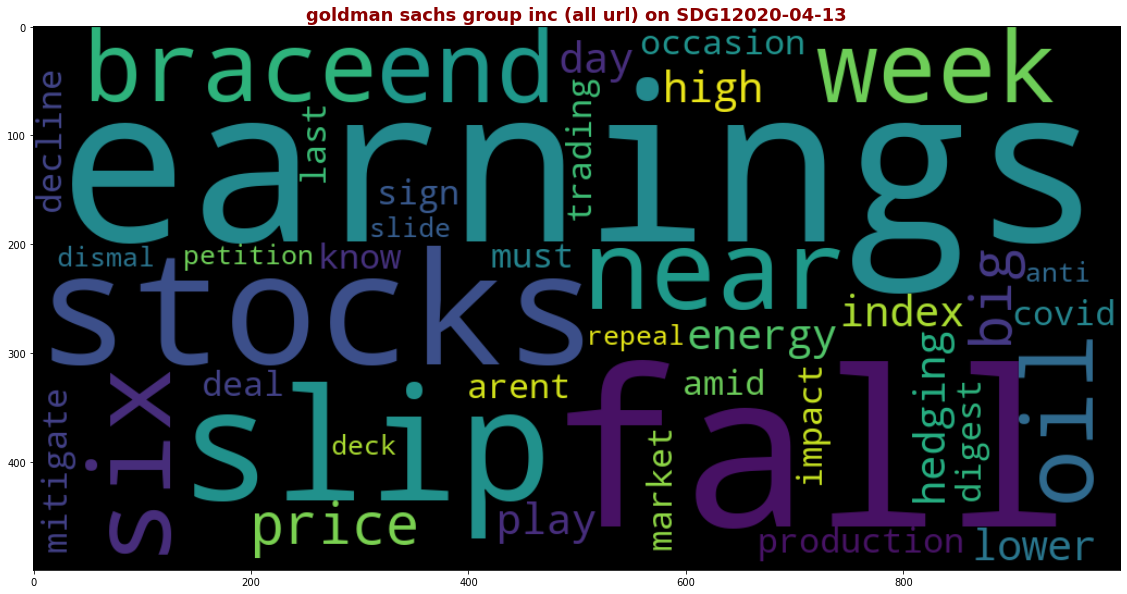

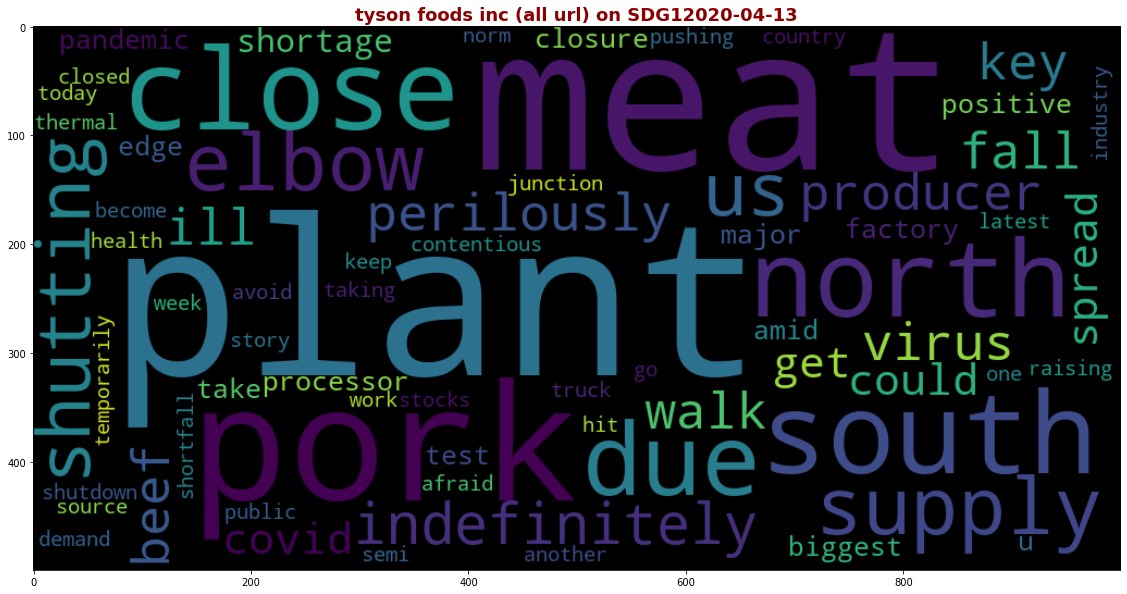

In [ ]:
df = outlier_all
for i in range(len(df)):
    company = list(df['COMPANY'])[i]
    date = list(df['date'])[i]
    sample = outlier_all['SDG_2_url'][i][2:-1].split(', ')
    word = check_english(clean_wordsList(clean_text_merge(clean_text(set(return_end_title(sample))))))
    cout_words = Counter(word)
    wordcloud = WordCloud(max_words =70,max_font_size=200, width=1000, height=500)
    wordcloud.generate_from_frequencies(frequencies = cout_words)
    plt.figure(figsize=(20,10) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(company + ' (all url) on SDG1'+ date , {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
# with PdfPages(company + ' (all url) on '+  date +'.pdf') as pdf:
#     wordcloud
#     pdf.savefig()

In [ ]:
def WCould(df_url, df_theme, company, SDG_Value, date, SDG):
    
    df = df_url[(df_url['COMPANY'] == company) & (df_url['date'] == date)]
    
    lst_url = [] # list of url of a specific SDG
    #url of one specific SDG theme(from 1 -17)
    if SDG != 'all':  
        for i in df['SDG_'+ str(SDG) + '_url']:
            lst_url.extend(i)
        lst_SDG = df_theme.iloc[:,SDG].dropna()
    # All url
    else:    
        for i in range(1,18):
            for j in df['SDG_'+ str(i) + '_url']:
                lst_url.extend(j)
        lst_url = set(lst_url)
        lst_SDG = [] 
        for i in range(1,18):
            lst_SDG.extend(df_theme.iloc[:,i].dropna())

    
    words = check_english(clean_wordsList(clean_text_merge(clean_text(set(return_end_title(lst_url))))))
    cout_words = Counter(words)

    wordcloud = WordCloud(max_words =70,max_font_size=200, width=1000, height=500)
    wordcloud.generate_from_frequencies(frequencies = cout_words)
    plt.figure(figsize=(20,10) )
    plt.imshow(wordcloud, interpolation="bilinear")
    if SDG != 'all':   
        plt.title(company + ' (' + df_theme.iloc[:,SDG].name + ') ' + str(SDG_Value) + ' on '+ date , {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
        with PdfPages(company + ' (' + df_theme.iloc[:,SDG].name + ') ' + str(SDG_Value) + ' on ' +'.pdf') as pdf:
            wordcloud
            pdf.savefig()
    else: 
        plt.title(company + ' (all url) on '+ date , {'fontsize': 18, 'color':'darkred', 'weight':'bold'})
        with PdfPages(company + ' (all url) on '+  date +'.pdf') as pdf:
            wordcloud
            pdf.savefig()
    plt.axis("off")
    plt.show()
    pd.DataFrame(lst_url).to_csv(company + ' (all url) on '+  date +'.csv')
    print(lst_url)
    
    return(lst_url)

In [ ]:
for index, row in outlier_all.iterrows():
    try:
        WCould(df_url, df_theme, row['COMPANY'], round(row['SDG_all'],2), row['SDG_all_Date'], 'all')
    except ValueError:
        print("No data")
        continue

In [ ]:
is_in_convexhull(points,newpoint)

False

In [ ]:
newpoint = [0,-2]
vector3 = np.array(newpoint)
angle3 = np.angle(complex(vector3[0],vector3[1]),deg=True) if np.angle(complex(vector3[0],vector3[1]),deg=True)>=0 else 360+np.angle(complex(vector3[0],vector3[1]),deg=True)

In [ ]:
angle3

270.0